# Generating constant density contours for bi-variate normal distribution 
## <center>𝑋 = (𝑋1, 𝑋2) ~𝑁 ((2, 1),[[2,0.4],[0.4,2]])</center>

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

#### Defining Mean and Covariance Matrices for the Bivariate distribution with size of 100 datapoints

In [151]:
mean = [2, 1]
cov = [[2, 0.4], [0.4, 2]]
size = 100

#### Generating the bivariate normal distribution

In [152]:
bivar_dist = multivariate_normal(mean, cov, seed=size)

#### Getting the mean and standard deviations for X1 and X2

In [159]:
mean_x1 = mean[0]
mean_x2 = mean[1]
sigma_x1 = cov[0][0]**0.5
sigma_x2 = cov[1][1]**0.5

#### The axes are generated from -3 * standard deviations to 3 * standard deviations. These axes are centered at the mean for better visualization

In [182]:
x_1 = np.linspace(-3 * sigma_x1 + mean_x1, 3 * sigma_x1 + mean_x1, 100)
x_2 = np.linspace(-3 * sigma_x2 + mean_x2, 3 * sigma_x2 + mean_x2, 100)

x1, x2 = np.meshgrid(x_1, x_2)

#### The probability density functions are evaluated for this meshgrid

In [183]:
pdf = np.zeros(x1.shape)
for i in range(x1.shape[0]):
    for j in range(x2.shape[1]):
        pdf[i, j] = bivar_dist.pdf([x1[i, j], x2[i, j]])

#### Now the density contours are plotted

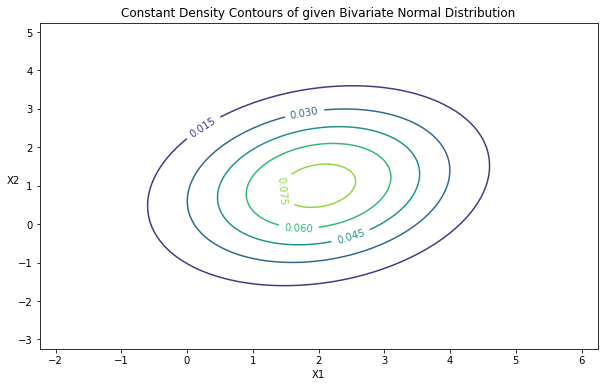

In [185]:
plt.figure(figsize=(10, 6))
cs = plt.contour(x1, x2, pdf)
plt.clabel(cs)
plt.title('Constant Density Contours of given Bivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2', rotation=360)
plt.show()

#### As X1 is plotted on x axis and X2 is plotted on y axis, the directions of the elliptical contours are self explanatory. The distribution is denser in the inner most contour and it spreads sparsely towards the outer contours. Hence the probability densities of the contours are decreasing outwards.

#### The lengths of the axes of contours are in multiples of standard deviations. The third concentric ellipse (light blue) is 1* sigma value. The outer most ellipse (purple) is 2* sigma value whereas the boundary of the plot is 3* sigma value. The semi major axis is for X1 and its lengths are multiples of sigma_x1 and the semi minor axis is for X2 and its lengths are multiples of sigma_x2. The plot is centred on mean (On x axis, mean of X1 = 2; on y axis, mean of X2 = 1)